# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


In [4]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

#### ML Problem
1. I chose the Airbnb NYC "listings" data set: airbnbListingsData.csv

2. I will be predicting the price of Airbnb listings. The label is the price column in the dataset.

3. This is a supervised learning problem because we have labeled data (the price) that we are trying to predict. This is a regression problem because the target variable, price, is continuous.

4. Some of the features that might be used:

neighbourhood_group
neighbourhood
room_type
minimum_nights
number_of_reviews
last_review
reviews_per_month
calculated_host_listings_count
availability_365

5. Predicting the price of Airbnb listings is important for both hosts and guests. Hosts can optimize their pricing strategies to maximize occupancy and revenue, while guests can identify fair prices and get the best value for their stays. For Airbnb as a company, a model that accurately predicts prices can improve the user experience, enhance market competitiveness, and increase overall satisfaction and trust in the platform. This can lead to higher customer retention and more transactions on their platform, ultimately boosting their revenue

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
features = ['neighbourhood_group_cleansed', 'room_type', 'instant_bookable', 'accommodates',
                     'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews', 
                     'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin',
                     'review_scores_communication', 'review_scores_location', 'review_scores_value',
                     'reviews_per_month', 'availability_365']
label = 'price'

In [6]:
# Check for missing values
print("--- Missing Values ---")
nan_count = np.sum(df.isnull(), axis = 0)
nan_count

--- Missing Values ---


name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

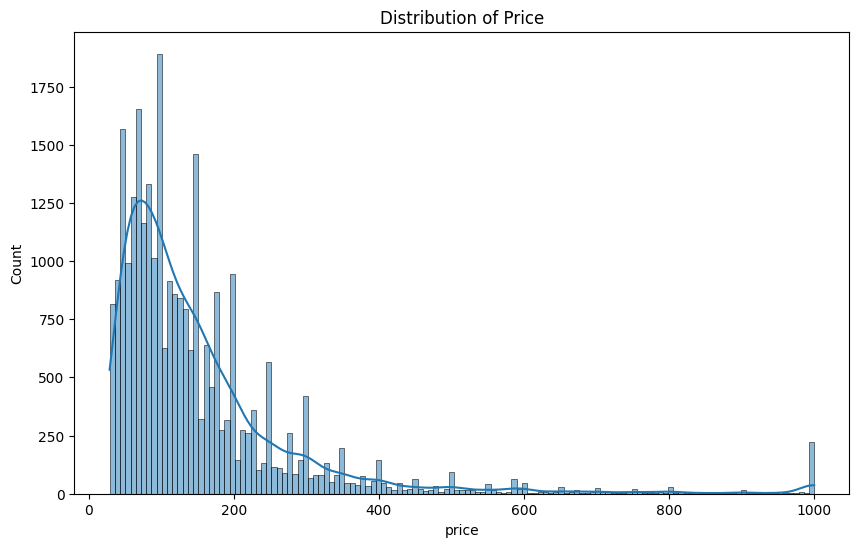

In [7]:
# Distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

In [8]:
corr_matrix = df[features + [label]].corr()

# Extract the correlation values for the target variable (price)
price_corr = corr_matrix[label].drop(label)

price_corr

instant_bookable               0.039190
accommodates                   0.519057
bathrooms                      0.331297
bedrooms                       0.475506
beds                           0.409236
minimum_nights                -0.079945
number_of_reviews             -0.033492
review_scores_rating           0.045067
review_scores_cleanliness      0.081402
review_scores_checkin         -0.004051
review_scores_communication    0.000590
review_scores_location         0.096610
review_scores_value           -0.004761
reviews_per_month              0.030817
availability_365               0.123984
Name: price, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

#### Data Preparation Techniques
- Addressing missing values (e.g., replacing missing values with means or medians)
- One-hot encoding categorical features (e.g., neighbourhood_group, room_type)
- Scaling numerical features (e.g., minimum_nights, reviews_per_month)
- Removing or capping outliers
- Feature selection to remove irrelevant features
 
#### Model Selection
I will use regression models suitable for predicting continuous variables. Possible models include:
- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Gradient Boosting Regression

#### Model Training and Evaluation
- Split the data into training and testing sets
- Train the model using the training set
- Evaluate the model's performance using the testing set
- Use metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared to evaluate the model
- Perform hyperparameter tuning and feature selection to improve the model's performance

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [9]:
# Replacing missing values
numerical_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews', 
                      'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value',
                      'reviews_per_month', 'availability_365']

for feature in numerical_features:
    df[feature].fillna(df[feature].median(), inplace=True)

# Verify missing values after imputation
print("--- Missing Values After Imputation ---")
nan_count = np.sum(df[numerical_features].isnull(), axis=0)
print(nan_count)


--- Missing Values After Imputation ---
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
minimum_nights                 0
number_of_reviews              0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
availability_365               0
dtype: int64


In [10]:
# Perform one-hot encoding on the specified categorical columns
df = pd.get_dummies(df, columns=['neighbourhood_group_cleansed', 'room_type', 'instant_bookable'])

# Verify one-hot encoding
print("\nFirst few rows of the encoded DataFrame:")
print(df.head())

print("\nColumns of the encoded DataFrame:")
print(df.columns)

print("\nData types of the columns:")
print(df.dtypes)



First few rows of the encoded DataFrame:
                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview    host_name  \
0  Centrally located in the heart of Manhattan ju...     Jennifer   
1  Just the right mix of urban center and local n...  LisaRoxanne   
2                                                NaN      Rebecca   
3    The

In [11]:
#Scaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [12]:
#Cap outliers

def cap_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = np.clip(df[feature], lower_bound, upper_bound)

for feature in numerical_features:
    cap_outliers(df, feature)


In [13]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'ca

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [15]:
selected_features = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'number_of_reviews', 
                      'review_scores_rating', 'review_scores_cleanliness', 'review_scores_checkin', 
                      'review_scores_communication', 'review_scores_location', 'review_scores_value',
                      'reviews_per_month', 'availability_365'] + \
                     [col for col in df.columns if col.startswith('neighbourhood_group_cleansed_') or
                      col.startswith('room_type_') or col.startswith('instant_bookable_')]

selected_features.append(label)
df = df[selected_features]

In [16]:
X = df.drop(columns=[label])
y = df[label]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor()
}

# Print shapes for verification
print("\nShapes of the splits:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


Shapes of the splits:
X_train shape: (22417, 25)
X_test shape: (5605, 25)
y_train shape: (22417,)
y_test shape: (5605,)


In [17]:
# Dictionary to store model evaluation results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'RMSE': rmse,
        'R2': r2
    }

# Print results
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  Root Mean Squared Error (RMSE): {metrics['RMSE']:.2f}")
    print(f"  R-squared (R2): {metrics['R2']:.2f}\n")


Linear Regression:
  Root Mean Squared Error (RMSE): 108.81
  R-squared (R2): 0.37

Decision Tree Regression:
  Root Mean Squared Error (RMSE): 145.02
  R-squared (R2): -0.11

Random Forest Regression:
  Root Mean Squared Error (RMSE): 100.00
  R-squared (R2): 0.47

Gradient Boosting Regression:
  Root Mean Squared Error (RMSE): 98.75
  R-squared (R2): 0.48



In [27]:
# Define parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [4, 8],
    'min_samples_leaf': [25, 50]
}

# Initialize Decision Tree Regressor and GridSearchCV
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid_dt, cv=3, scoring='neg_mean_squared_error', verbose=1)
dt_grid_search = dt_grid.fit(X_train, y_train)

# Best score (RMSE)
rmse_DT = np.sqrt(-dt_grid_search.best_score_)
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT))

# Best parameters
dt_best_params = dt_grid_search.best_params_
print("Best params for Decision tree: ", dt_best_params)

# Train the best model with optimal parameters
dt_model = DecisionTreeRegressor(
    max_depth=dt_best_params['max_depth'],
    min_samples_leaf=dt_best_params['min_samples_leaf']
)
dt_model.fit(X_train, y_train)

# Predict and evaluate
y_dt_pred = dt_model.predict(X_test)

# Calculate metrics
dt_rmse = np.sqrt(mean_squared_error(y_test, y_dt_pred))
dt_r2 = r2_score(y_test, y_dt_pred)

print('[DT] Root Mean Squared Error: {:.2f}'.format(dt_rmse))
print('[DT] R2: {:.2f}'.format(dt_r2))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[DT] RMSE for the best model is : 109.74
Best params for Decision tree:  {'max_depth': 8, 'min_samples_leaf': 25}
[DT] Root Mean Squared Error: 102.95
[DT] R2: 0.44


In [28]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest Regressor and GridSearchCV
rf_regressor = RandomForestRegressor()
rf_grid = GridSearchCV(rf_regressor, param_grid_rf, cv=3, scoring='neg_mean_squared_error', verbose=1)
rf_grid_search = rf_grid.fit(X_train, y_train)

# Best score (RMSE)
rmse_RF = np.sqrt(-rf_grid_search.best_score_)
print("[RF] RMSE for the best model is : {:.2f}".format(rmse_RF))

# Best parameters
rf_best_params = rf_grid_search.best_params_
print("Best params for Random Forest: ", rf_best_params)

# Train the best model with optimal parameters
rf_model = RandomForestRegressor(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf']
)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_rf_pred = rf_model.predict(X_test)

# Calculate metrics
rf_rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {:.2f}'.format(rf_rmse))
print('[RF] R2: {:.2f}'.format(rf_r2))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[RF] RMSE for the best model is : 104.00
Best params for Random Forest:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
[RF] Root Mean Squared Error: 98.32
[RF] R2: 0.49


In [18]:
param_grid_gb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Gradient Boosting Regressor and GridSearchCV
gb_regressor = GradientBoostingRegressor()
gb_grid = GridSearchCV(gb_regressor, param_grid_gb, cv=3, scoring='neg_mean_squared_error', verbose=1)
gb_grid_search = gb_grid.fit(X_train, y_train)

# Best score (RMSE)
rmse_GB = np.sqrt(-gb_grid_search.best_score_)
print("[GB] RMSE for the best model is : {:.2f}".format(rmse_GB))

# Best parameters
gb_best_params = gb_grid_search.best_params_
print("Best params for Gradient Boosting: ", gb_best_params)

# Train the best model with optimal parameters
gb_model = GradientBoostingRegressor(
    n_estimators=gb_best_params['n_estimators'],
    learning_rate=gb_best_params['learning_rate'],
    max_depth=gb_best_params['max_depth'],
    min_samples_split=gb_best_params['min_samples_split'],
    min_samples_leaf=gb_best_params['min_samples_leaf']
)
gb_model.fit(X_train, y_train)

# Predict and evaluate
y_gb_pred = gb_model.predict(X_test)

# Calculate metrics
gb_rmse = np.sqrt(mean_squared_error(y_test, y_gb_pred))
gb_r2 = r2_score(y_test, y_gb_pred)

print('[GB] Root Mean Squared Error: {:.2f}'.format(gb_rmse))
print('[GB] R2: {:.2f}'.format(gb_r2))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[GB] RMSE for the best model is : 101.45
Best params for Gradient Boosting:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
[GB] Root Mean Squared Error: 95.21
[GB] R2: 0.52
